<a href="https://colab.research.google.com/github/shreyadas226/CCE_Assignment/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
# data = loadmat('ex7data2.mat')
# X = data['X']
# centroids = kMeans_init_centroids(X, K)
# for iter in range(iterations):
#     idx = find_closest_centroids(X, centroids)
#     centroids = compute_centroids(X, C, K)
# plt.plot(X[:, 0], X[:, 1], 'bo')
# plt.plot(centroids[:, 0], centroids[:, 1], 'ro')
# plt.show
def find_closest_centroids(X, centroids):
    """
    Assign each data point to the closest centroid

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    centroids: ndarray of shape (K, n) - K centroids with n features

    Output:
    idx: ndarray of shape (m,) - index of the closest centroid for each data point
    """
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(K):
            norm_ij=np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx

# The function find_closest_centroids_test is now outside the find_closest_centroids function.
def find_closest_centroids_test(target):
    print("Running tests for find_closest_centroids:")
    X = np.array([[1, 1], [2, 1], [4, 3], [5, 4]])
    centroids = np.array([[1, 2], [5, 3]])
    idx = target(X, centroids)
    expected_idx = np.array([0, 0, 1, 1])

    print("\nTest case 1:")
    print("Input X:", X)
    print("Input centroids:", centroids)
    print("Expected output:", expected_idx)
    print("Actual output:", idx)

    assert np.all(idx == expected_idx), f"Test case 1 failed. Expected: {expected_idx}, got: {idx}"

    # Test case 2: 3D example
    X = np.array([[1, 1, 1], [2, 2, 2], [4, 4, 4], [5, 5, 5]])
    centroids = np.array([[1, 1, 1], [4, 4, 4]])
    idx = target(X, centroids)
    expected_idx = np.array([0, 0, 1, 1])

    print("\nTest case 2:")
    print("Input X:", X)
    print("Input centroids:", centroids)
    print("Expected output:", expected_idx)
    print("Actual output:", idx)

    assert np.all(idx == expected_idx), f"Test case 2 failed. Expected: {expected_idx}, got: {idx}"
 # Test case 3: More centroids than points
    X = np.array([[1, 1], [4, 4]])
    centroids = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
    idx = target(X, centroids)
    expected_idx = np.array([0, 3])

    print("\nTest case 3:")
    print("Input X:", X)
    print("Input centroids:", centroids)
    print("Expected output:", expected_idx)
    print("Actual output:", idx)

    assert np.all(idx == expected_idx), f"Test case 3 failed. Expected: {expected_idx}, got: {idx}"

    print("\n\033[92mAll tests passed!")

find_closest_centroids_test(find_closest_centroids)

Running tests for find_closest_centroids:

Test case 1:
Input X: [[1 1]
 [2 1]
 [4 3]
 [5 4]]
Input centroids: [[1 2]
 [5 3]]
Expected output: [0 0 1 1]
Actual output: [0 0 1 1]

Test case 2:
Input X: [[1 1 1]
 [2 2 2]
 [4 4 4]
 [5 5 5]]
Input centroids: [[1 1 1]
 [4 4 4]]
Expected output: [0 0 1 1]
Actual output: [0 0 1 1]

Test case 3:
Input X: [[1 1]
 [4 4]]
Input centroids: [[1 1]
 [2 2]
 [3 3]
 [4 4]]
Expected output: [0 3]
Actual output: [0 3]

All tests passed!


Exercise 2


In [19]:
def compute_centroids(X, idx, K):
    """
    Compute new centroids based on the current assignments

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    idx: ndarray of shape (m,) - current assignments
    K: int - number of clusters

    Output:
    centroids: ndarray of shape (K, n) - updated centroids
    """
    m, n = X.shape # Fixed indentation
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis=0)
    return centroids

# The compute_centroids_test is now outside the compute_centroids function.
def compute_centroids_test(target):
    print("Running tests for compute_centroids:")
    # Test case 1: Simple 2D example
    X = np.array([[1, 1], [2, 1], [4, 3], [5, 4]])
    idx = np.array([0, 0, 1, 1])
    K = 2
    centroids = target(X, idx, K)
    expected_centroids = np.array([[1.5, 1], [4.5, 3.5]])
    #Removed extra indentation from this line
    print("\nTest case 1:")
    print("Input X:", X)
    print("Input idx:", idx)
    print("Input K:", K)
    print("Expected output:", expected_centroids)
    print("Actual output:", centroids)

    assert np.allclose(centroids, expected_centroids), f"Test case 1 failed. Expected: {expected_centroids}, got: {centroids}"
 # Test case 2: 3D example
    X = np.array([[1, 1, 1], [2, 2, 2], [4, 4, 4], [5, 5, 5]])
    idx = np.array([0, 0, 1, 1])
    K = 2
    centroids = target(X, idx, K)
    expected_centroids = np.array([[1.5, 1.5, 1.5], [4.5, 4.5, 4.5]])

    print("\nTest case 2:")
    print("Input X:", X)
    print("Input idx:", idx)
    print("Input K:", K)
    print("Expected output:", expected_centroids)
    print("Actual output:", centroids)

    assert np.allclose(centroids, expected_centroids), f"Test case 2 failed. Expected: {expected_centroids}, got: {centroids}"

    # Test case 3:
    X = np.array([[1, 1], [2, 2], [4, 4], [5, 5]])
    idx = np.array([0, 0, 1, 1])
    K = 3
    centroids = target(X, idx, K)
    expected_centroids = np.array([[1.5, 1.5], [4.5, 4.5], [0, 0]])

    print("\nTest case 3:")
    print("Input X:", X)
    print("Input idx:", idx)
    print("Input K:", K)
    print("Expected output:", expected_centroids)
    print("Actual output:", centroids)

    assert np.allclose(centroids, expected_centroids), f"Test case 3 failed. Expected: {expected_centroids}, got: {centroids}"

    print("\n\033[92mAll tests passed!")
compute_centroids_test(compute_centroids)

Running tests for compute_centroids:

Test case 1:
Input X: [[1 1]
 [2 1]
 [4 3]
 [5 4]]
Input idx: [0 0 1 1]
Input K: 2
Expected output: [[1.5 1. ]
 [4.5 3.5]]
Actual output: [[1.5 1. ]
 [4.5 3.5]]

Test case 2:
Input X: [[1 1 1]
 [2 2 2]
 [4 4 4]
 [5 5 5]]
Input idx: [0 0 1 1]
Input K: 2
Expected output: [[1.5 1.5 1.5]
 [4.5 4.5 4.5]]
Actual output: [[1.5 1.5 1.5]
 [4.5 4.5 4.5]]

Test case 3:
Input X: [[1 1]
 [2 2]
 [4 4]
 [5 5]]
Input idx: [0 0 1 1]
Input K: 3
Expected output: [[1.5 1.5]
 [4.5 4.5]
 [0.  0. ]]
Actual output: [[1.5 1.5]
 [4.5 4.5]
 [nan nan]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


AssertionError: Test case 3 failed. Expected: [[1.5 1.5]
 [4.5 4.5]
 [0.  0. ]], got: [[1.5 1.5]
 [4.5 4.5]
 [nan nan]]

Exercise 3

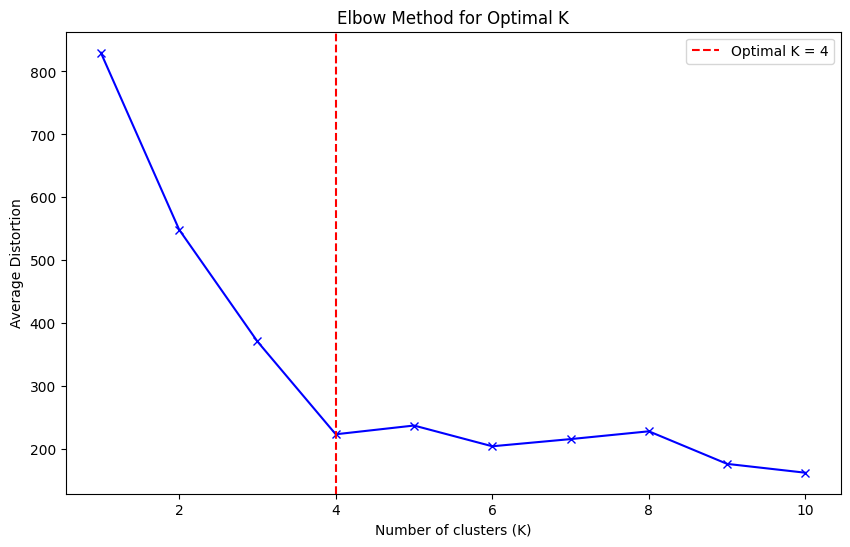

The optimal number of clusters (K) is: 4
Optimal K: 4
Running tests for plot_elbow:


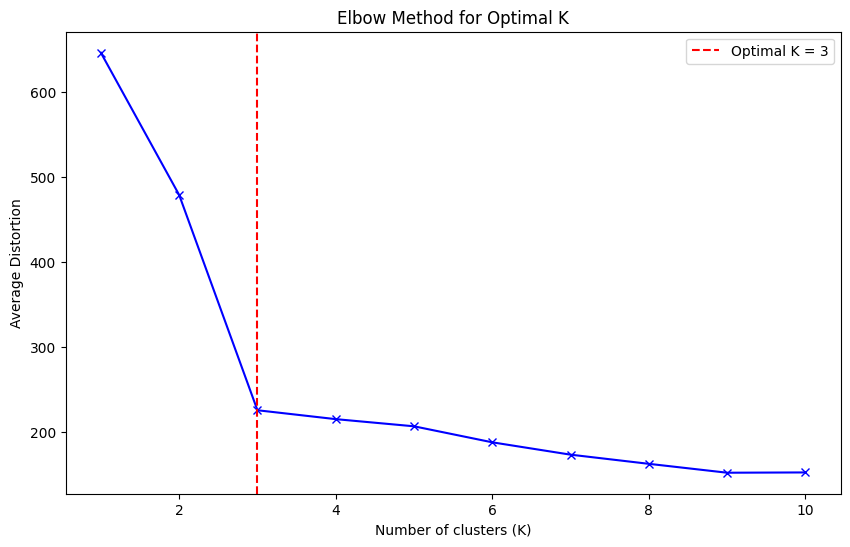

The optimal number of clusters (K) is: 3

Test case 1 (3 clusters):
Input X shape: (300, 2)
Input max_K: 10
Optimal K: 3


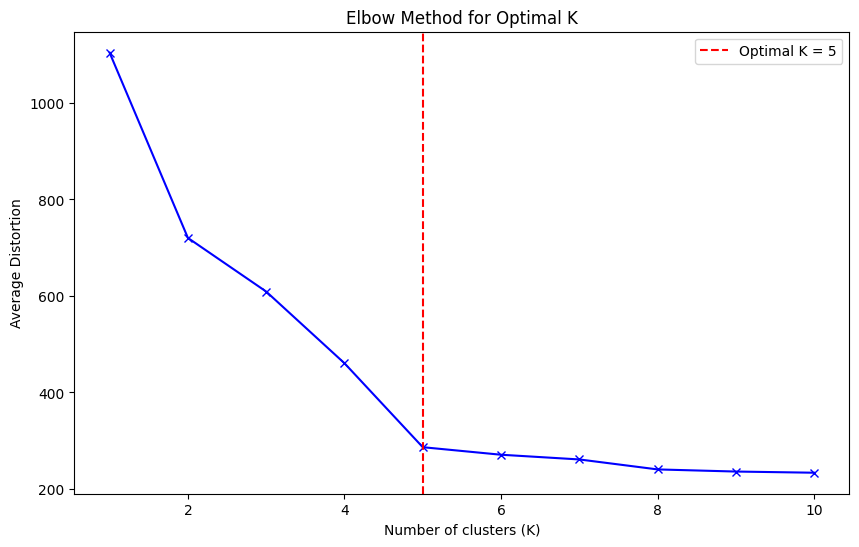

The optimal number of clusters (K) is: 5

Test case 2 (4 clusters):
Input X shape: (400, 2)
Input max_K: 10
Optimal K: 5

All tests passed!


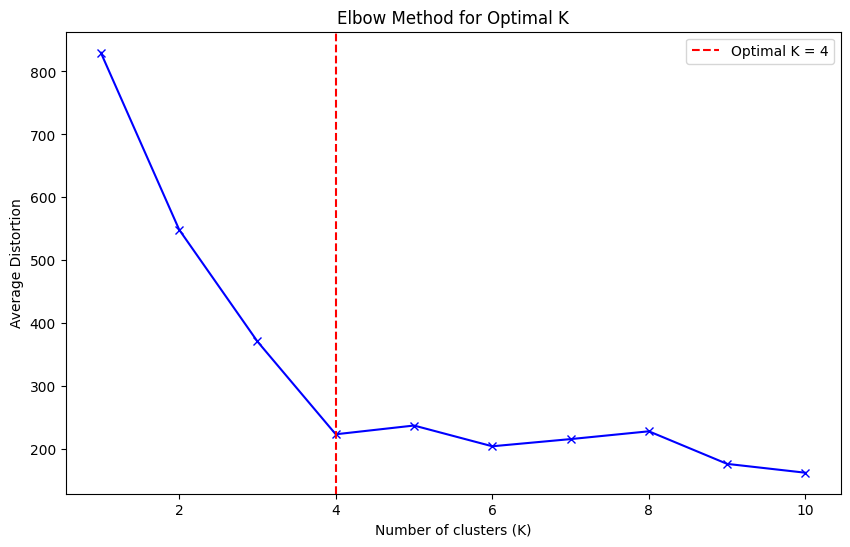

The optimal number of clusters (K) is: 4
Optimal K: 4


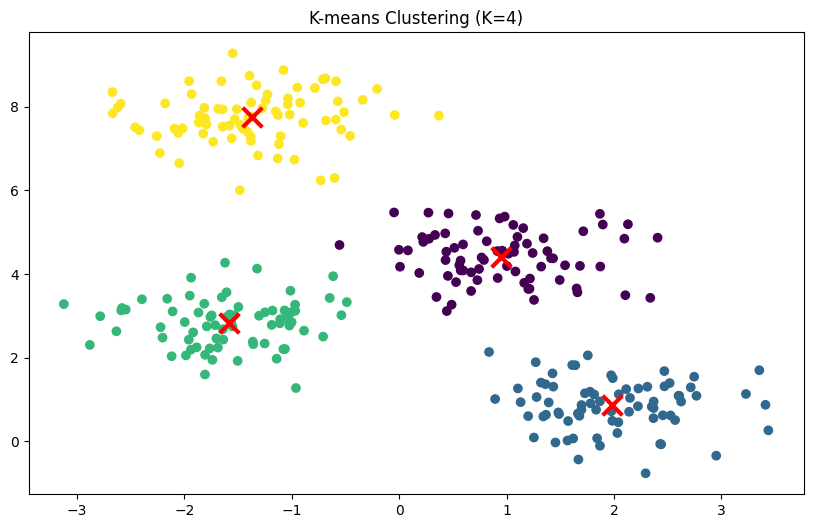

K-means clustering completed.


In [32]:

!pip install kneed
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def plot_elbow(X, max_K):
    """
    Plot the elbow curve to find the optimal K

    Input:
        X: ndarray of shape (m, n) - m data points with n features
        max_K: int - maximum number of clusters to try

    Output:
        Elbow plot
        optimal_k: int - optimal number of clusters
    """
    distortions = []
    K_range = range(1, max_K + 1)

    for K in K_range:
        centroids = X[np.random.choice(X.shape[0], K, replace=False)]

        # Moved the following line outside the inner loop to calculate the distortion for each K, not for each iteration.
        distortion = 0
        for _ in range(10):  # Run K-means for 10 iterations
            idx = find_closest_centroids(X, centroids)
            centroids = compute_centroids(X, idx, K)
            distortion += np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)) # Calculate distortion and add it to the variable distortion

        # Calculate average distortion for each K
        distortions.append(distortion / 10)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Average Distortion')
    plt.title('Elbow Method for Optimal K')
    kneedle = KneeLocator(K_range, distortions, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.legend()
    plt.show()
    print(f"The optimal number of clusters (K) is: {optimal_k}")
    return optimal_k

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
optimal_k = plot_elbow(X, max_K=10)
print(f"Optimal K: {optimal_k}")
from sklearn.datasets import make_blobs

def plot_elbow_test(target):
    print("Running tests for plot_elbow:")

    np.random.seed(42)

    # Test case 1: 3 clusters
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
    max_K = 10

    optimal_k = target(X, max_K)

    print("\nTest case 1 (3 clusters):")
    print("Input X shape:", X.shape)
    print("Input max_K:", max_K)
    print("Optimal K:", optimal_k)

    assert 2 <= optimal_k <= 4, f"Test case 1 failed. Expected optimal K between 2 and 4, got: {optimal_k}"

    # Test case 2: 4 clusters
    X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
    max_K = 10

    optimal_k = target(X, max_K)

    print("\nTest case 2 (4 clusters):")
    print("Input X shape:", X.shape)
    print("Input max_K:", max_K)
    print("Optimal K:", optimal_k)

    assert 3 <= optimal_k <= 5, f"Test case 2 failed. Expected optimal K between 3 and 5, got: {optimal_k}"


    print("\n\033[92mAll tests passed!")
plot_elbow_test(plot_elbow)
from sklearn.datasets import make_blobs

def run_kmeans(X, K, max_iter=100):
    """
    Run the full K-means algorithm

    Input:
    X: ndarray of shape (m, n) - m data points with n features
    K: int - number of clusters
    max_iter: int - maximum number of iterations

    Output:
    centroids: ndarray of shape (K, n) - final centroids
    idx: ndarray of shape (m,) - final assignments
    """
    m, n = X.shape
    centroids = X[np.random.choice(m, K, replace=False)]

    for _ in range(max_iter):
        idx = find_closest_centroids(X, centroids)
        new_centroids = compute_centroids(X, idx, K)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.title(f'K-means Clustering (K={K})')
    plt.show()

    return centroids, idx

# Main execution
if __name__ == "__main__":
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Find optimal K using the elbow method
    optimal_k = plot_elbow(X, max_K=10)
    print(f"Optimal K: {optimal_k}")

    # Run K-means with the optimal K
    centroids, idx = run_kmeans(X, optimal_k)

    print("K-means clustering completed.")